## Analyse de données du test du 29 octobre 2023

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import scipy
import seaborn as sns


### Moteur : kraken.2+?.0 30k
#### Configuration comparée : 

In [2]:
sim_data = pd.read_csv('data_config-30k-29-octobre-2023.csv')
real_data = pd.read_csv('data-output-2023-10-29-17h16m48s.csv', sep = ';')

In [3]:
sim_data

,Time (s),ISP (m/s),C* (m/s),Pe/Pb (-),Thrust (N),Impulse (Ns),P tank (psia),P inj. (psia),P comb (psia),P crit (psia),O/F (-),m. ox. (kg/s),Gox (kg/s-m2),r. (mm/s)
0,0.000,1877.747720,1332.881174,0.831127,4623.517076,4.623517,770.998218,623.897832,339.979757,467.536413,3.019433,1.849677,612.375781,7.301857
1,0.001,1877.746367,1332.878062,0.831138,4623.416790,9.246934,770.965412,623.870104,339.984228,467.515476,3.019397,1.849632,612.072881,7.300050
2,0.002,1877.737665,1332.873514,0.831129,4623.252016,13.870186,770.932608,623.835706,339.980844,467.489001,3.019344,1.849567,611.763259,7.298202
3,0.003,1877.730807,1332.870475,0.831120,4623.139088,18.493325,770.899806,623.808113,339.977043,467.468176,3.019308,1.849523,611.461078,7.296399
4,0.004,1877.722362,1332.867063,0.831107,4623.010290,23.116335,770.867006,623.778801,339.971675,467.445924,3.019267,1.849474,611.157378,7.294586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6829,6.829,1792.237157,1307.060861,0.682697,3696.040659,28438.644877,568.853339,448.847225,279.263300,336.285716,2.727188,1.508951,122.923165,3.270857
6830,6.830,1792.222189,1307.056546,0.682675,3695.900411,28442.340778,568.825307,448.823296,279.254114,336.267969,2.727141,1.508899,122.906101,3.270630
6831,6.831,1792.207221,1307.052231,0.682652,3695.760162,28446.036538,568.797276,448.799367,279.244928,336.250223,2.727094,1.508847,122.889042,3.270403
6832,6.832,1792.192251,1307.047915,0.682630,3695.619909,28449.732158,568.769245,448.775438,279.235741,336.232476,2.727048,1.508796,122.871986,3.270176


In [4]:
sim_data.columns

Index(['Time      (s)', 'ISP     (m/s)', 'C*      (m/s)', 'Pe/Pb     (-)',
       'Thrust    (N)', 'Impulse  (Ns)', 'P tank (psia)', 'P inj. (psia)',
       'P comb (psia)', 'P crit (psia)', 'O/F       (-)', 'm. ox. (kg/s)',
       'Gox (kg/s-m2)', 'r.     (mm/s)'],
      dtype='object')

In [5]:
real_data

,time,ain1,ain2,ain4,ain5,ain8,ain9,ain11,ain12,ain13,LCM101_LOADCELL_ain1,PX309_OMEGA_ain2,PX309_OMEGA_ain4,PX309_OMEGA_ain5,thermocouple_AD8495_ain8,thermocouple_AD8495_ain9,LC101_200_ain11,thermocouple_AD8495_ain12,thermocouple_AD8495_ain13
0,0.0025,0.68182,3.69556,2.74498,0.00284,-1.37186,-2.90573,1.94726,-0.84320,-1.76914,485.30736,739.11185,548.99677,0.56845,-524.37208,-831.14583,65.90123,-418.64030,-603.82882
1,0.0050,0.68309,3.69935,2.74909,0.01453,-1.36681,-2.90099,1.94694,-0.84036,-1.76441,486.37374,739.86978,549.81786,2.90541,-523.36150,-830.19842,65.88778,-418.07185,-602.88140
2,0.0075,0.68340,3.69588,2.76330,0.00347,-1.35449,-2.88268,1.94726,-0.82931,-1.74925,486.64034,739.17501,552.66012,0.69477,-520.89822,-826.53507,65.90123,-415.86121,-599.84967
3,0.0100,0.68214,3.68672,2.77814,0.00821,-1.35007,-2.88046,1.94663,-0.82741,-1.74388,485.57396,737.34334,555.62869,1.64219,-520.01396,-826.09294,65.87433,-415.48224,-598.77593
4,0.0125,0.68277,3.67598,2.78130,0.00979,-1.35481,-2.88204,1.94631,-0.83720,-1.75462,486.10715,735.19586,556.26030,1.95800,-520.96138,-826.40875,65.86088,-417.44024,-600.92340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265995,664.9900,0.68309,0.97710,-0.07011,0.00347,-2.26054,-3.34975,1.69746,-0.98595,-1.92799,486.37374,195.42062,-14.02178,0.69477,-702.10758,-919.95042,55.26200,-447.18914,-635.59888
265996,664.9925,0.68340,0.98658,-0.06727,-0.00189,-2.26401,-3.34880,1.69809,-0.98405,-1.92452,486.64034,197.31545,-13.45333,-0.37897,-702.80236,-919.76094,55.28890,-446.81017,-634.90411
265997,664.9950,0.68309,0.98026,-0.07737,0.00916,-2.26938,-3.35828,1.69714,-0.99100,-1.93431,486.37374,196.05223,-15.47448,1.83167,-703.87610,-921.65578,55.24855,-448.19972,-636.86210
265998,664.9975,0.74656,0.99100,-0.08621,0.00537,-2.27317,-3.36270,1.69619,-0.99731,-1.94157,539.95943,198.19971,-17.24300,1.07374,-704.63403,-922.54003,55.20819,-449.46294,-638.31481


In [6]:
mean_before = real_data[real_data['time'] < 630.]['LCM101_LOADCELL_ain1'].mean()
real_data[real_data['time'] < 630.]['LCM101_LOADCELL_ain1'].describe()

count    251999.000000
mean        486.127750
std           1.487351
min         469.844830
25%         485.840550
50%         486.373740
75%         486.640340
max         493.571820
Name: LCM101_LOADCELL_ain1, dtype: float64

De ce qu'on peut remarquer du temps avant 630u, la valeur de base tourne autour de 486 N(u?), et la déviation standard du capteur est de 1.487 N(u?). 

In [7]:
def show_thrust_data(x,y):
    if type(y) == list:
        for liste in y :
            plt.scatter(x,liste,s=3)
    else:
        plt.scatter(x, y,s = 3)
    plt.xlabel('Time')
    plt.ylabel('Thrust (N?)')
    plt.show()

In [8]:
real_data = real_data[real_data['time'] > 649]
real_data = real_data[real_data['time'] < 665]

real_data['time'] = real_data['time'] - real_data['time'].min()
real_data = real_data[real_data['time']<0.8]
real_data = real_data[real_data['time']>0]
real_data.dropna()
real_data['thrust_mvg_avg'] = real_data['LCM101_LOADCELL_ain1'].rolling(window=30).mean()

# Fit a cubic polynomial to the moving average of the thrust data
coeff = np.polyfit(real_data['time'], real_data['LCM101_LOADCELL_ain1'], deg=3)
print(coeff)
def ignition_data(max_thrust,dt = 0.001):
    a,b,c,d = coeff
    coeff = [-29118.76867808  31342.97234717  -1605.90936194  410.15048635]
    x_min_fit = (-2*b + math.sqrt((2*b)**2 - 4*3*a*c))/(6*a)
    x_max_fit = (-2*b - math.sqrt((2*b)**2-4*3*a*c))/(6*a)
    ignition_time = x_max_fit-x_min_fit
    points = np.linspace(0, ignition_time, round((1/dt)*ignition_time))
    fit = np.polyval(coeff,points)
    fit_at_zero = fit - fit.min()
    fit_scaled = fit_at_zero*(max_thrust/fit_at_zero.max())
    return fit_scaled , points
plt.plot(ignition_data(coeff,0.001,5000)[1])
# Your custom function for showing thrust data, which I assume plots the raw data
show_thrust_data(real_data['time'], [real_data['LCM101_LOADCELL_ain1'], real_data['thrust_mvg_avg']])

# Plot the moving average data
plt.plot(real_data['time'], real_data['thrust_mvg_avg'], label='Moving Average')

# Calculate fitted polynomial values
fitted_values = np.polyval(coeff, real_data['time']+x_min_fit)
print('max' , np.polyval(coeff,x_max_fit))
print('min', np.polyval(coeff,x_min_fit))
#print(fitted_values)

# Plot the fitted polynomial curve
plt.plot(real_data['time']+x_min_fit, fitted_values, label='Cubic Fit')
plt.legend()
# Assuming you want to see the plot, you need to call plt.show()
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1951927660.py, line 15)

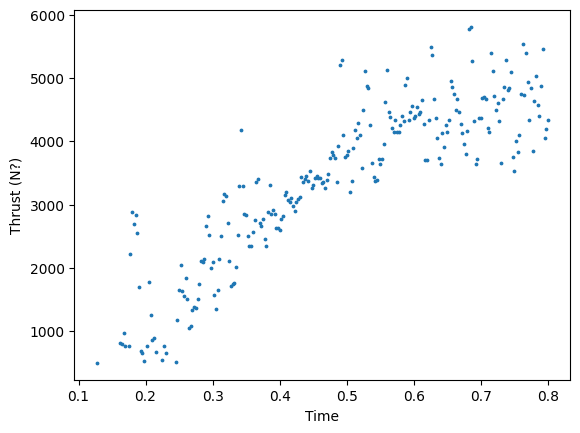

In [ ]:
std_dev_before = 1.487 #see above
real_data = real_data[real_data['LCM101_LOADCELL_ain1'] > (std_dev_before + mean_before)]
show_thrust_data(real_data['time'],real_data['LCM101_LOADCELL_ain1'])

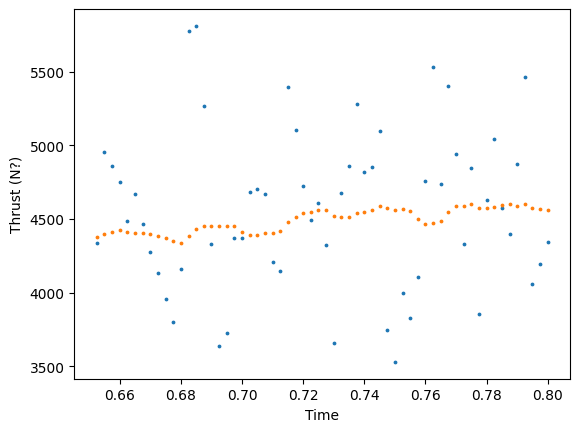

In [ ]:
real_high_thrust = real_data[(real_data['time'] > 0.65) & (real_data['time'] < 9.1)]

show_thrust_data(real_high_thrust['time'],[real_high_thrust['LCM101_LOADCELL_ain1'],real_high_thrust['thrust_mvg_avg']])


C:\Users\colin\AppData\Local\Temp\ipykernel_4540\711866857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_high_thrust['difference_with_mvg_avg'] = np.abs(real_high_thrust['LCM101_LOADCELL_ain1'] - real_high_thrust['thrust_mvg_avg'])


Mean deviation of thrust with moving average : 429.89465021666666
 Standard deviation of sensor before burn: 1.487




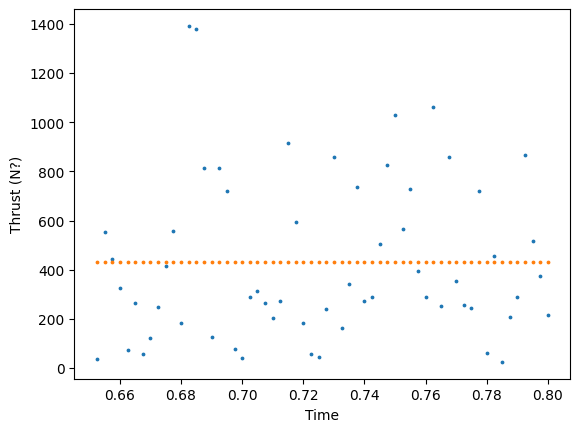

In [ ]:
real_high_thrust['difference_with_mvg_avg'] = np.abs(real_high_thrust['LCM101_LOADCELL_ain1'] - real_high_thrust['thrust_mvg_avg'])
mean_diff_high_thrust = real_high_thrust['difference_with_mvg_avg'].mean()
print(f'Mean deviation of thrust with moving average : {mean_diff_high_thrust}\n Standard deviation of sensor before burn: {std_dev_before}\n\n')

show_thrust_data(real_high_thrust['time'],[real_high_thrust['difference_with_mvg_avg'],[mean_diff_high_thrust]*len(real_high_thrust['time'])])


count      60.000000
mean      429.894650
std       331.368835
min        25.157723
25%       205.993867
50%       302.070419
75%       625.428497
max      1391.566068
Name: difference_with_mvg_avg, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x20296996d10>,
 'caps': [<matplotlib.lines.Line2D at 0x202968e2410>,
 'boxes': [<matplotlib.lines.Line2D at 0x202962563d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20296929710>],
 'fliers': [<matplotlib.lines.Line2D at 0x20296277350>],
 'means': []}

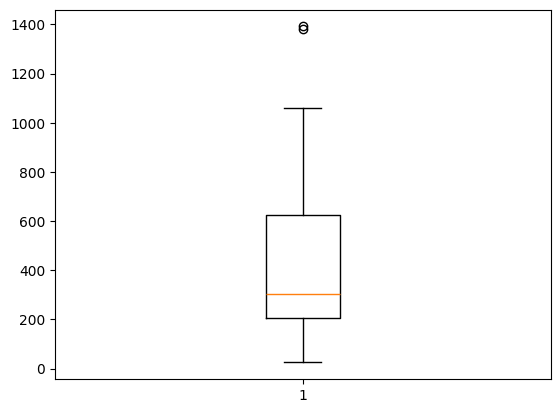

In [ ]:
print(real_high_thrust['difference_with_mvg_avg'].describe())
plt.boxplot(real_high_thrust['difference_with_mvg_avg'])

C:\Users\colin\AppData\Local\Temp\ipykernel_4540\2660548615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_high_thrust['difference_mvg_avg'] = real_high_thrust['difference_with_mvg_avg'].rolling(window = 60).mean()


[-21008867.60203336  61088021.73305162 -66536280.36620816
  32173531.21680523  -5827198.01247817]


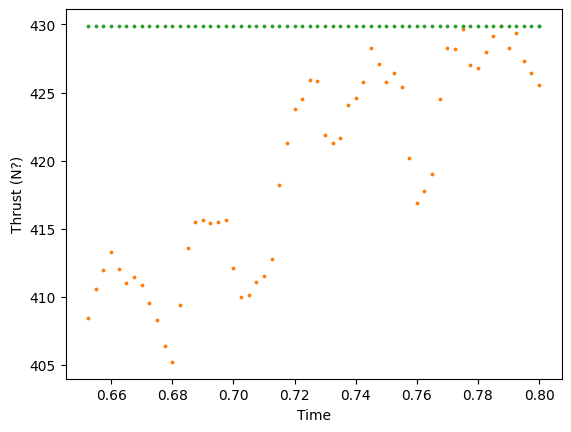

In [ ]:

real_high_thrust['difference_mvg_avg'] = real_high_thrust['difference_with_mvg_avg'].rolling(window = 60).mean()
coeff = np.polyfit(real_high_thrust['time'],real_high_thrust['difference_with_mvg_avg'],4)
print(coeff)
scaled_to_oscillations = real_high_thrust['thrust_mvg_avg'].max()/real_high_thrust['difference_mvg_avg'].max()

show_thrust_data(real_high_thrust['time'],[real_high_thrust['difference_mvg_avg'],real_high_thrust['thrust_mvg_avg']/scaled_to_oscillations,[mean_diff_high_thrust]*len(real_high_thrust['time'])])


Rolling mean NaN check: True
Rolling std NaN check: True


TypeError: expected non-empty vector for x

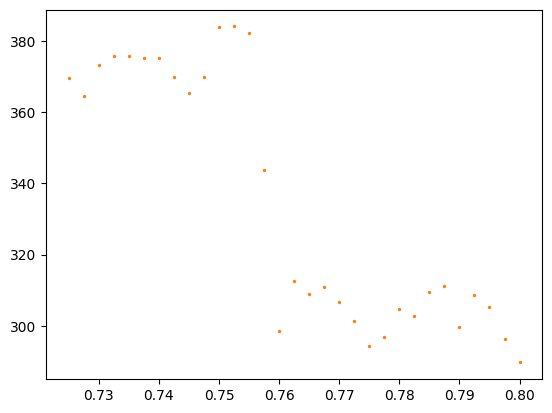

In [ ]:

plt.scatter(real_high_thrust['time'],(real_high_thrust['difference_with_mvg_avg']-real_high_thrust['difference_with_mvg_avg'].mean()).rolling(window = 150).mean(),s = 2,label = 'mean')
plt.scatter(real_high_thrust['time'],(real_high_thrust['difference_with_mvg_avg']-real_high_thrust['difference_with_mvg_avg'].mean()).rolling(window = 30).std(),s = 2,label = 'std')

# Check for NaN in the rolling mean and std
rolling_mean = (real_high_thrust['difference_with_mvg_avg'] - real_high_thrust['difference_with_mvg_avg'].mean()).rolling(window=150).mean()
rolling_std = (real_high_thrust['difference_with_mvg_avg'] - real_high_thrust['difference_with_mvg_avg'].mean()).rolling(window=15).std()

print(f'Rolling mean NaN check: {rolling_mean.isna().any()}')
print(f'Rolling std NaN check: {rolling_std.isna().any()}')

# If there are NaN values present, you can drop them and fit the remaining data
if rolling_mean.isna().any() or rolling_std.isna().any():
    valid_indices = ~rolling_mean.isna() & ~rolling_std.isna()  # indices where neither mean nor std is NaN
    valid_time = real_high_thrust['time'][valid_indices]
    valid_mean = rolling_mean[valid_indices]
    valid_std = rolling_std[valid_indices]
else:
    # No NaN values, proceed as usual
    valid_time = real_high_thrust['time']
    valid_mean = rolling_mean
    valid_std = rolling_std

# Polynomial fits
difference_mean = np.polyfit(valid_time, valid_mean, deg=5)
difference_std = np.polyfit(valid_time, valid_std, deg=5)

# Printing the result
print(f'mean_fit: {difference_mean}')
print(f'std_fit: {difference_std}')

def plot_poly(time, poly):
    #deg_croissant = poly[::-1]  # Reverse the polynomial coefficients for increasing powers
    time_values = np.linspace(time.min(), time.max(), num=100)  # Generate 100 points for smoothness
    YS = np.polyval(poly, time_values)  # Evaluate polynomial at each point
    
    plt.plot(time_values, YS)  # Plot the polynomial line

plot_poly(valid_time,difference_mean)
plot_poly(valid_time,difference_std)
plt.ylim(-200,500)
plt.xlim(0,10)

    


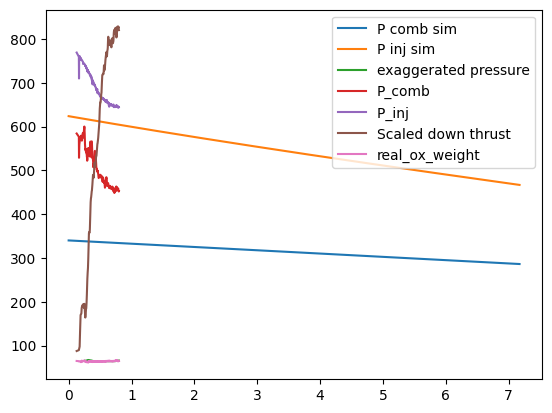

In [ ]:


plt.plot(sim_data['Time      (s)'],sim_data['P comb (psia)'],label = 'P comb sim')
plt.plot(sim_data['Time      (s)'],sim_data['P inj. (psia)'],label = 'P inj sim')

real_t = real_data['time']
real_pressure = real_data['PX309_OMEGA_ain2']
other_pressure = real_data['PX309_OMEGA_ain4']

center  = real_data['LC101_200_ain11']-real_data['LC101_200_ain11'].mean()
augmented_pressure = (0.5*center**4+real_data['LC101_200_ain11'].mean()).rolling(window= 30).mean()
plt.plot(real_t,augmented_pressure,label = 'exaggerated pressure')
plt.plot(real_t,other_pressure,label = 'P_comb')
plt.plot(real_t, real_pressure,label = 'P_inj ')
plt.plot(real_t,real_data['thrust_mvg_avg']*0.18,label = 'Scaled down thrust')
plt.plot(real_t,real_data['LC101_200_ain11'],label = 'real_ox_weight')
plt.legend()
plt.show()

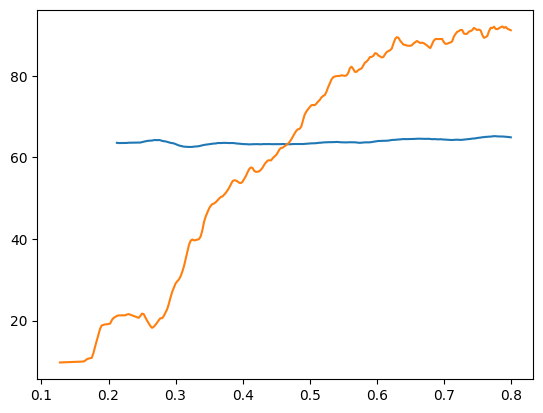

In [ ]:
plt.plot(real_t, real_data['LC101_200_ain11'].rolling(window = 20).mean())
plt.plot(real_t,real_data['thrust_mvg_avg']*0.02)

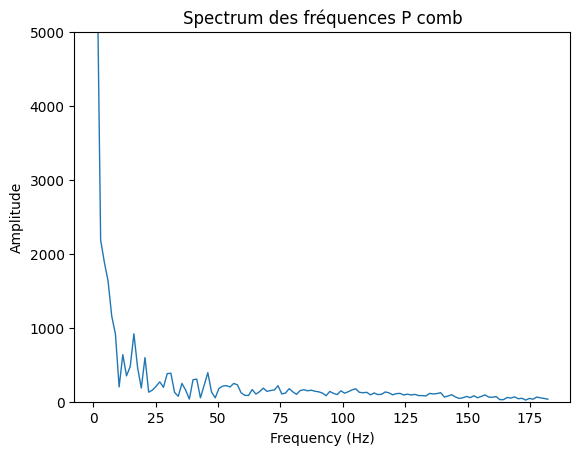

max resonnance : [45.91002814]


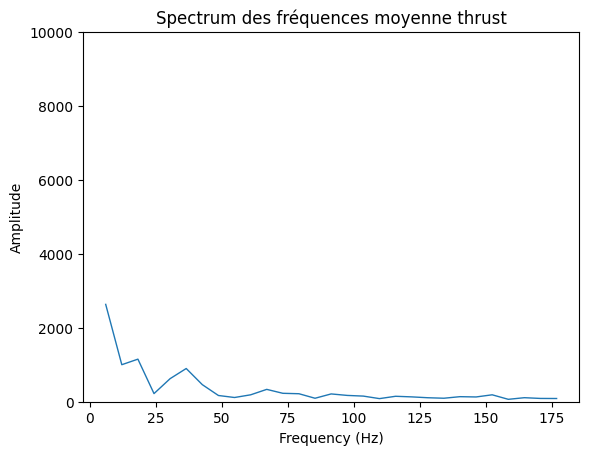

max resonnance : [36.57992565]


In [ ]:
def fft(value ,t = real_data['time'], name = '', ylim = 10000):
    y = value - value.mean()
    fft_values = np.fft.fft(y)
    frequencies = np.fft.fftfreq(len(y), d=np.mean(np.diff(t)))

    amplitudes = np.abs(fft_values)
    positive_freq_idxs = np.where(frequencies > 0)
    frequencies = frequencies[positive_freq_idxs]
    amplitudes = amplitudes[positive_freq_idxs]

    plt.figure()
    plt.plot(frequencies, amplitudes,linewidth = 1)
    plt.title('Spectrum des fréquences '+ name)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.ylim(0, ylim)
    plt.show()
    amp = amplitudes[frequencies>25]
    frequencies = frequencies[frequencies>25]
    print(f"max resonnance : {frequencies[amp == max(amp)]}")

    return frequencies,amplitudes

fft(other_pressure,ylim = 5000, name = 'P comb')

frequencies, amplitudes = fft(real_high_thrust['thrust_mvg_avg'],name = 'moyenne thrust')

In [ ]:

max_after_75 = frequencies[frequencies>50][amplitudes[frequencies>50]>8000]
A_max_after_75 = amplitudes[frequencies>50][amplitudes[frequencies>50]>8000]

print('max frequencies : ',  max_after_75)
print('max_amplitudes_with_frequencies :', A_max_after_75)
mean_first_after_75_hz = max_after_75[0].mean()
mean_second_after_75_hz = max_after_75[1].mean()

print(f'\nMost important oscillations frequence, greater than 75 hz :\nFirst : {mean_first_after_75_hz},\nSecond : {mean_second_after_75_hz}')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 29 but corresponding boolean dimension is 25

In [ ]:
#Éviter les valeurs NaN for some reasons il y en a, à voir
t = real_high_thrust[real_high_thrust['difference_mvg_avg'].isnull() == False]['time']
y = real_high_thrust['difference_mvg_avg'].dropna()

fft(y,t =t, name = 'difference_mvg_avg')
plt.show()



TypeError: fft() got an unexpected keyword argument 'name'

À voir la ligne à 35Hz-ish, mais pas très interssant

Exploration:
 - Voir si on peut trouver une corrélation entre une un t et t+h, ou h = lag 

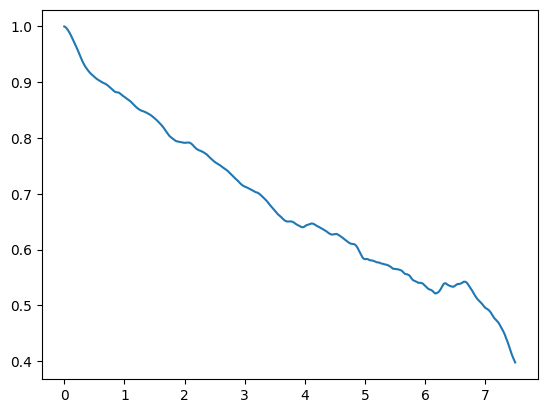

In [ ]:
#Pour voir tous les lags, durant le burn
plt.plot([i*np.abs(t.iloc[0]-t.iloc[1]) for i in range(3000)], [real_data['thrust_mvg_avg'].autocorr(i) for i in range(3000)])

<Axes: >

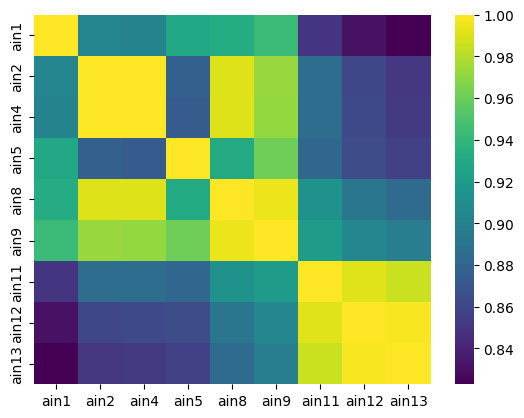

In [ ]:
#Check general correlations between sensors
sns.heatmap(real_data[['ain1','ain2','ain4','ain5','ain8','ain9','ain11','ain12','ain13']].corr(),cmap = sns.color_palette("viridis", as_cmap=True))

### Impulsion analysis

Total impulse : 32.4 (kNs)
Total sim impulse : 30.2 (kNs)


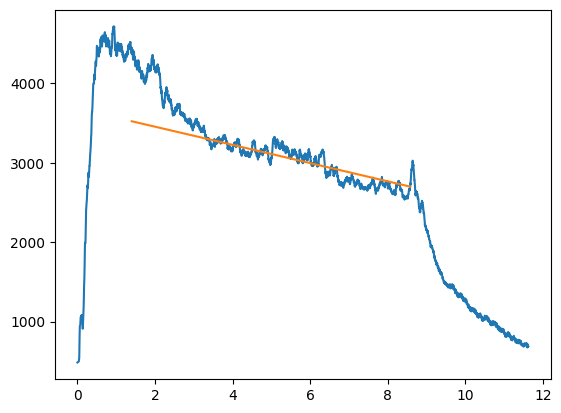

In [ ]:

real_data = real_data[real_data['time']< 11.75]
real_data = real_data[real_data['time']>0.1]
t = real_data['time']-real_data['time'].min()

plt.plot(t,real_data['thrust_mvg_avg'])
integral = np.trapz(real_data['thrust_mvg_avg'],t)

plt.plot(sim_data['Time      (s)']+1.4,sim_data['Thrust    (N)']-1100)
sim_integral = np.trapz(sim_data['Thrust    (N)'],sim_data['Time      (s)'])
'''fit_data = real_data[real_data['thrust_mvg_avg'] > 2.2 & real_data['thrust_mvg_avg'] < 8.4]
fit_data = np.polyval(np.polyfit(real_data['time'],real_data['thrust_mvg_avg']))
plt.plot(t,real_data['thrust_mvg_avg'])'''

print(f'Total impulse : {integral/1000:.1f} (kNs)')
print(f'Total sim impulse : {sim_integral/1000:.1f} (kNs)')

In [ ]:
sim_pente = np.polyfit(sim_data['Time      (s)'],sim_data['Thrust    (N)'],1)
coeff = np.polyfit(real_high_thrust['time'], real_high_thrust['thrust_mvg_avg'],1)
print(f'pente sim : {sim_pente[0]}\nvrai pente : {coeff[0]},\nratio : {np.abs(sim_pente[0]/coeff[0]):.2%}')

pente sim : -114.76038108589351
vrai pente : -228.60597983686517,
ratio : 50.20%


In [ ]:
sim_data.columns

Index(['Time      (s)', 'ISP     (m/s)', 'C*      (m/s)', 'Pe/Pb     (-)',
       'Thrust    (N)', 'Impulse  (Ns)', 'P tank (psia)', 'P inj. (psia)',
       'P comb (psia)', 'P crit (psia)', 'O/F       (-)', 'm. ox. (kg/s)',
       'Gox (kg/s-m2)', 'r.     (mm/s)'],
      dtype='object')